In [2]:
import numpy as np
import pandas as pd
from scipy import spatial
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Loading The Vectors

In [3]:
embeddings_dict= {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
     for line in f:
         values= line.split()
         word= values [0]
         vector= np.array(values[1:],"float32")
         embeddings_dict[word]=vector

# Finding Similar Vectors

In [4]:
def find_closest_embeddings(embedding):
  return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [6]:
print(find_closest_embeddings(embeddings_dict["man"])[1:6])

['woman', 'another', 'boy', 'one', 'old']


In [7]:
print(find_closest_embeddings(embeddings_dict["nails"]-embeddings_dict["branch"]+embeddings_dict["hand"])[:6])


['nails', 'fingernails', 'nail', 'fingers', 'plastic', 'sticks']


# Visualizing the Vectors

In [22]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:100])


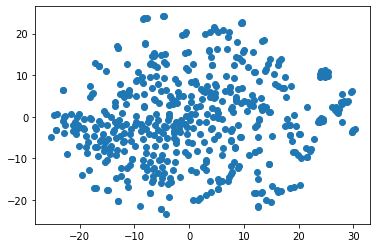

In [20]:
plt.scatter(Y[:, 0], Y[:, 1])

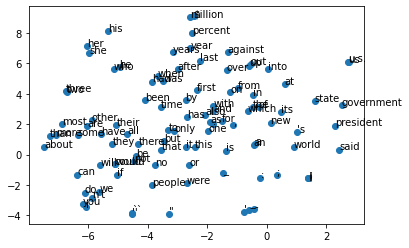

In [23]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

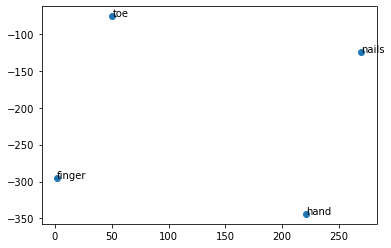

In [15]:
tsne= TSNE(n_components=2, random_state=0)
tokens= ["nails", "finger", "hand", "toe"]
vectors=[embeddings_dict[token] for token in tokens]
Y=tsne.fit_transform(vectors[:1000])

plt.scatter(Y[:,0], Y[:, 1])
for label, x,y in zip(tokens, Y[:,0], Y[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords="offset points")
plt.show()